# **Clasificacion Basica: Predecir una imagen de moda**

Se entrena un modelo de red neuronal para clasificar imágenes de ropa como tenis o camisetas. Es un repaso rápido de un programa completo de TensorFlow con explicaciones a medida que avanza.

**¿Para qué sirve?**

Para aprender a reconocer y clasificar imágenes automáticamente usando redes neuronales.

1) **Importación de librerías y verificación de versión**

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


Configura las herramientas básicas necesarias para construir y entrenar modelos de machine learning en Python.

Esta guía usa el conjunto de datos [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) que contiene 70 000 imágenes en escala de grises en 10 categorías. Las imágenes muestran artículos individuales de prendas de vestir en baja resolución (28 x 28 píxeles), como se puede ver a continuación:

<table>
  <tr><td>     <img src="https://tensorflow.org/images/fashion-mnist-sprite.png" alt="Fashion MNIST sprite" width="600">   </td></tr>
  <tr><td align="center">     <b>Figura 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Muestras de Fashion-MNIST</a> (de Zalando, licencia MIT).<br> </td></tr>
</table>

Fashion MNIST fue pensado como reemplazo directo del clásico conjunto de datos [MNIST](http://yann.lecun.com/exdb/mnist/), a menudo usado como el "Hola, mundo" de los programas de aprendizaje automático para visión artificial. El conjunto de datos MNIST contiene imágenes de dígitos escritos a mano (0, 1, 2, etc.) en un formato idéntico al de las prendas de vestir que usará aquí.

Esta guía usa Fashion MNIST para variar y porque constituye un desafío ligeramente más difícil que el MNIST común. Ambos conjuntos de datos son relativamente pequeños y se usan para comprobar que un algoritmo funcione según lo previsto. Suponen un buen punto de partida para la prueba y depuración de los códigos.

Aquí, se utilizan 60 000 imágenes para entrenar la red y 10 000 imágenes para evaluar la precisión con la que la red aprendió a clasificar imágenes. Puede acceder a Fashion MNIST directamente desde TensorFlow. Importe y [cargue los datos de Fashion MNIST](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directamente desde TensorFlow:

# **Carga del dataset Fashion MNIST**

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


*  **Permite acceder a un dataset de imágenes de ropa listo para usar en tareas de clasificación de imágenes.**

Cargar el conjunto de datos devuelve cuatro arreglos NumPy:

- Los arreglos `train_images` y `train_labels` constituyen el *conjunto de entrenamiento*, los datos que el modelo usa para aprender.
- El modelo se compara con el *conjunto de prueba*, los arreglos `test_images`, y `test_labels`.

Las imágenes son arreglos NumPy de 28x28, con valores de píxeles que van de 0 a 255. Las *letiquetas* son un arreglo de números enteros, que van de 0 a 9. Estos corresponden a la *clase* de prenda de vestir que representa la imagen:

<table>
  <tr>
    <th>Etiqueta</th>
    <th>Clase</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen se asigna a una etiqueta única. Dado que los *nombres de las clases* no se incluyen en los conjuntos de datos, almacénelos aquí para usarlos más tarde, al trazar las imágenes:

# **Definición de nombres de clases**

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

* Este código asigna nombres a las etiquetas del dataset Fashion MNIST, que originalmente son números del 0 al 9.

**Verificación de la forma del dataset de entrenamiento**

In [ ]:
train_images.shape

(60000, 28, 28)

Este código muestra las dimensiones del conjunto de imágenes de entrenamiento de Fashion MNIST.

**Qué hace:**

train_images.shape
Devuelve una tupla que indica cantidad de imágenes, altura y ancho de cada imagen.

**Cantidad de etiquetas en el conjunto de entrenamiento**

In [ ]:
len(train_labels)

60000

Sirve para verificar que cada imagen tiene su correspondiente etiqueta antes de entrenar el modelo.

**Visualización de las etiquetas del conjunto de entrenamiento**

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

* Este código muestra las etiquetas numéricas de todas las imágenes del dataset de entrenamiento de Fashion MNIST.

**Verificación de la forma del dataset de prueba**

In [ ]:
test_images.shape

(10000, 28, 28)

Este código muestra las dimensiones del conjunto de imágenes de prueba de Fashion MNIST.

**Cantidad de etiquetas en el conjunto de prueba**

In [ ]:
len(test_labels)

10000

Permite verificar que cada imagen de prueba tiene su correspondiente etiqueta para evaluar el modelo.

**Visualización de una imagen de entrenamiento**

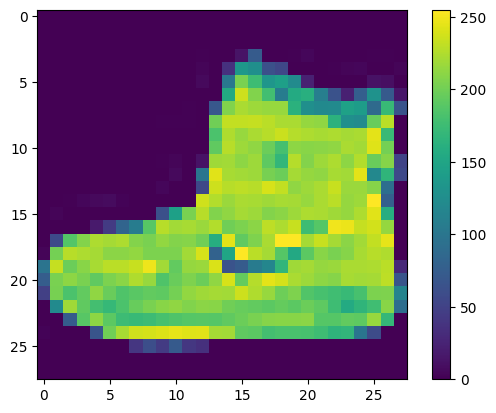

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Este código muestra gráficamente la primera imagen del conjunto de entrenamiento de Fashion MNIST.

**Normalización de las imágenes**

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Este código ajusta los valores de los píxeles de las imágenes para que estén entre 0 y 1.


**Visualización de múltiples imágenes del conjunto de entrenamiento**

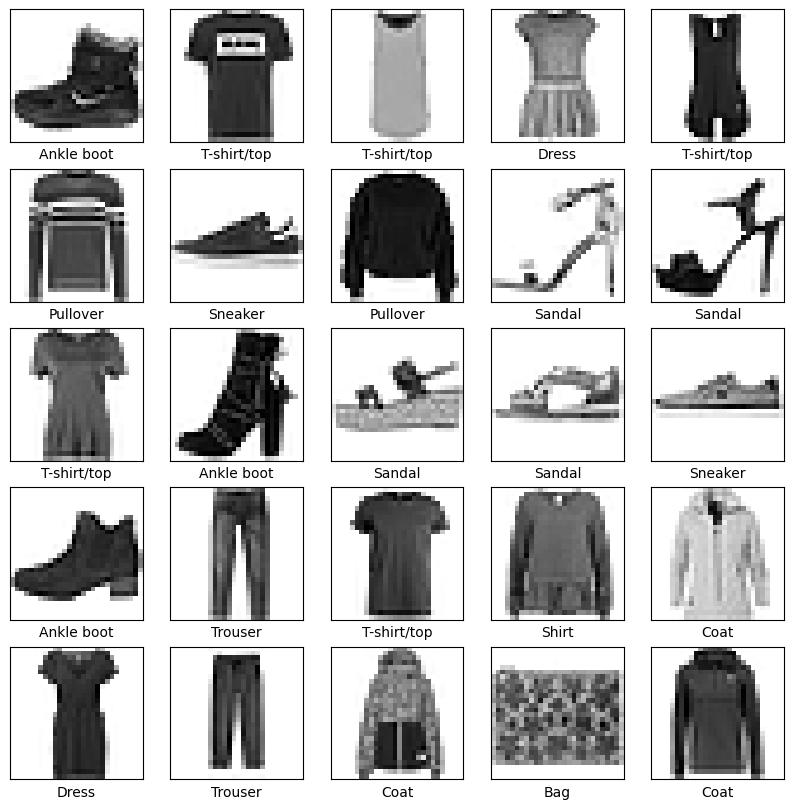

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Este código muestra las primeras 20 imágenes del dataset de Fashion MNIST con sus etiquetas correspondientes.

**Creación del modelo de red neuronal**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Construye el modelo que tomará las imágenes y las clasificará en una de las 10 clases de ropa.

**Compilación del modelo**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Este código prepara el modelo para el entrenamiento definiendo el optimizador, la función de pérdida y la métrica de evaluación.

**Entrenamiento del modelo**

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7808 - loss: 0.6266
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8618 - loss: 0.3841
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8761 - loss: 0.3383
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8877 - loss: 0.3080
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8898 - loss: 0.2972
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8956 - loss: 0.2795
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9017 - loss: 0.2646
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9061 - loss: 0.2536
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9070 - loss: 0.2500
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9112 - loss: 0.2379


Este código entrena la red neuronal utilizando las imágenes y etiquetas de Fashion MNIST.

**Evaluación del modelo**

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.8689 - loss: 0.3876

Test accuracy: 0.8689000010490417


Este código mide qué tan bien funciona el modelo en el conjunto de prueba de Fashion MNIST.

**Creación de un modelo de probabilidades**

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

Este código envuelve el modelo entrenado con una capa Softmax para obtener probabilidades de cada clase.

**Realizar predicciones con el modelo**

In [ ]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Este código usa el modelo de probabilidades para predecir las clases de las imágenes de prueba.

**Ver predicción de la primera imagen de prueba**

In [ ]:
predictions[0]

array([3.2767366e-06, 2.3891220e-10, 4.0619088e-07, 3.1461075e-10,
       5.4767018e-09, 2.1874368e-04, 4.0996272e-07, 1.5460653e-03,
       4.4523425e-08, 9.9823105e-01], dtype=float32)

Permite analizar cómo el modelo distribuye la confianza entre las diferentes categorías para una imagen concreta.

**Obtener la clase predicha para la primera imagen**

In [ ]:
np.argmax(predictions[0])

np.int64(9)

Este código devuelve el índice de la clase con mayor probabilidad para la primera imagen de prueba.

**Ver la etiqueta real de la primera imagen de prueba**

In [ ]:
test_labels[0]

np.uint8(9)

Permite comparar la predicción del modelo con la etiqueta real para evaluar su exactitud en un ejemplo específico.

**Funciones para visualizar predicciones**

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Estas funciones ayudan a interpretar visualmente qué tan confiable es el modelo para cada imagen y a identificar errores.

**Visualizar predicción de una imagen**

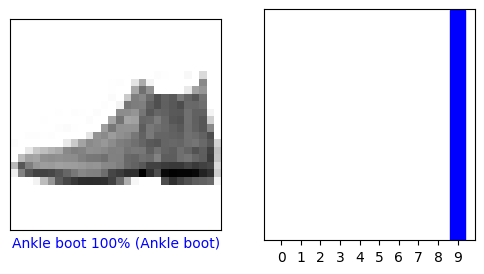

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Este código muestra una imagen de prueba y su predicción de manera gráfica.

**Qué hace:**

* plot_image (lado izquierdo)
Muestra la imagen con el nombre de la clase predicha y su probabilidad. El color indica si la predicción es correcta (azul) o incorrecta (rojo).

* plot_value_array (lado derecho)
Muestra un gráfico de barras con las probabilidades para todas las clases, destacando la predicción y la etiqueta real.

**Visualizar la predicción de la primera imagen de prueba**

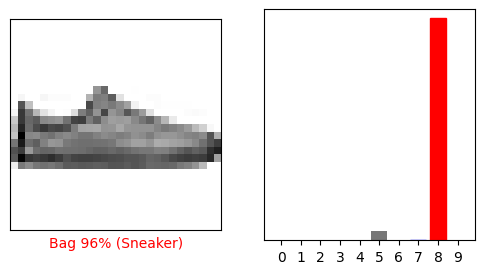

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Este bloque genera una visualización doble de la primera imagen de prueba.

**Qué hace:**

* Lado izquierdo (plot_image): muestra la imagen con la clase predicha y su probabilidad. Azul = correcto, rojo = incorrecto.

* Lado derecho (plot_value_array): gráfico de barras con la probabilidad de cada clase. La barra roja es la predicción, la azul es la etiqueta real.

**Visualizar múltiples predicciones del conjunto de prueba**

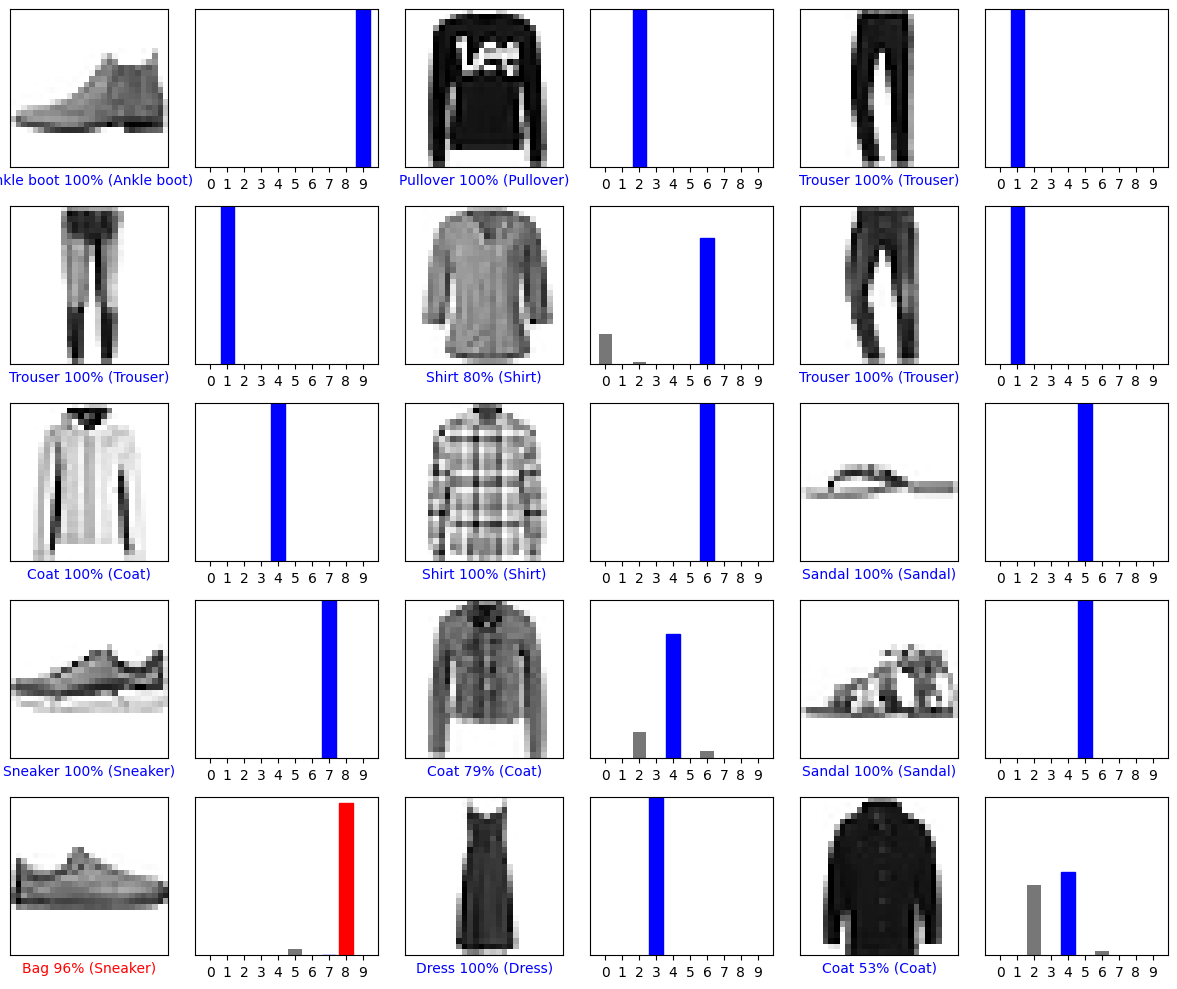

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Este código crea una galería de imágenes con sus predicciones y probabilidades.

**Qué hace:**

* Muestra las primeras num_images imágenes del conjunto de prueba.

**Para cada imagen:**

* Lado izquierdo: la imagen con la clase predicha (azul si es correcta, rojo si es incorrecta).

* Lado derecho: gráfico de barras con las probabilidades de todas las clases, destacando la predicción y la etiqueta real.

**Seleccionar una imagen del conjunto de prueba**

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Este código toma la segunda imagen del conjunto de prueba (test_images[1]) y muestra su forma.

**Qué hace:**

img = test_images[1]
Selecciona una imagen específica para hacer predicciones individuales.

print(img.shape)
Muestra las dimensiones de la imagen, que en Fashion MNIST son (28, 28) píxeles.

**Preparar la imagen para la predicción del modelo**

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Este código convierte una imagen individual en un batch de tamaño 1, que es el formato que espera el modelo.

**Hacer predicción para una sola imagen**

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[1.0071783e-04 6.4375934e-14 9.9984956e-01 1.2565993e-11 3.5872410e-05
  1.3645246e-12 1.3816995e-05 5.9936976e-23 8.6280262e-12 3.2236873e-13]]


Permite ver qué clase cree el modelo que representa la imagen y con qué confianza.

**Visualizar la predicción de una sola imagen**

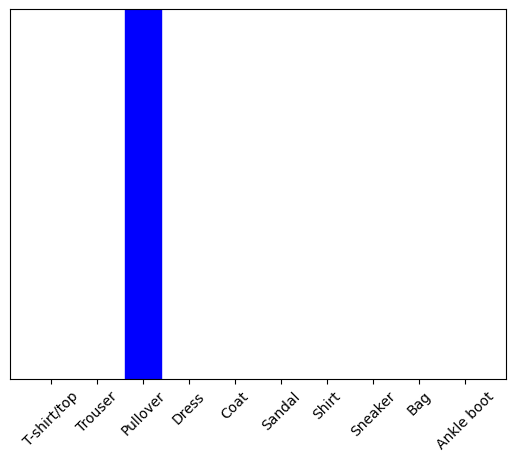

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

Este código genera un gráfico de barras para mostrar las probabilidades de cada clase de una imagen individual.

**Obtener la clase predicha para una imagen**

In [ ]:
np.argmax(predictions_single[0])

np.int64(2)

Este código determina qué clase predice el modelo para la imagen individual.

**Qué hace:**

* np.argmax(predictions_single[0])
Devuelve el índice de la clase con la probabilidad más alta en predictions_single[0].

## **Conclusion**

Este proyecto muestra cómo construir un modelo de clasificación de imágenes que puede identificar correctamente el tipo de prenda de ropa en imágenes del conjunto Fashion MNIST.

**Resumen de pasos y utilidad:**

* **Carga y preparación de datos:** Se cargan las imágenes de entrenamiento y prueba, y se normalizan los valores de píxeles para que estén entre 0 y 1.

* **Visualización de los datos:** Se revisan algunas imágenes y etiquetas para entender mejor el conjunto de datos.

* **Creación y entrenamiento del modelo:** Se construye un modelo secuencial simple con una capa de entrada que aplana las imágenes, una capa densa oculta con activación ReLU y una capa de salida con softmax que predice 10 clases.

* **Evaluación y predicción:** Se mide la precisión del modelo sobre el conjunto de prueba y se generan predicciones, incluyendo la probabilidad de cada clase para imágenes individuales.

* **Visualización de resultados:** Se muestran gráficos comparando las predicciones del modelo con las etiquetas reales, permitiendo identificar aciertos y errores de manera visual.

**Utilidad:**
Este flujo de trabajo permite automatizar la clasificación de imágenes, lo que es útil en aplicaciones de reconocimiento de objetos, inventarios automatizados, búsqueda de productos, sistemas de recomendación y cualquier proyecto que requiera identificar categorías de imágenes de forma eficiente.